In [1]:
!pip install seaborn

In [2]:
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import seaborn as sns
from PIL import Image
from wordcloud import ImageColorGenerator

In [3]:
nlp1= pd.read_excel("PFDConsolidatedSessionReviewdata 2013-2020 WIP (1).xlsx",sheet_name='Raw data')

In [4]:
nlp1.School.unique()

array(['Hodari Boys Club', 'Kianda school', 'Kiianda school', 'Kianda',
       'SBS', 'SBS ', 'Strahmore school', 'Strathmore School',
       'Strathmore school', 'Strathmore School '], dtype=object)

In [5]:
nlp1.describe()

,Year,G-E. The discussions helped to raise and solve problems,G-H. This session has been useful in enriching our Family Life
count,9038.000000,4022.000000,4028.000000
mean,2016.337796,3.411735,3.603525
std,2.234303,0.656717,0.600850
min,2013.000000,1.000000,1.000000
25%,2014.000000,3.000000,3.000000
50%,2016.000000,3.000000,4.000000
75%,2018.000000,4.000000,4.000000
max,2020.000000,5.000000,4.000000


In [6]:
nlp1.describe(include = 'object').transpose()

,count,unique,top,freq
School,9038,10,Kianda school,2985
CourseName,9038,8,First Letters,2574
Class/Form,5468,15,Grade 4,1356
CourseID,9038,71,KSFL2013,499
Moderator,9038,73,S.Nganga,1251
Session Date,9038,136,08.02.2020,298
Course Session Code,9038,383,KSTe2020-2,115
Session Name,9038,99,Small Trifles. This won't last Long,500
Session Theme,8386,79,Marriage: A Shared Project of Love and Life,522
Analysis Basis,9038,2,Parenting,5571


In [8]:
len(nlp1.columns)

33

In [9]:
nlp1['C-A. We discussed the case as a couple before team meeting'].unique()

array([nan, 3, 4, 2, 1, ' ', 'No', 'Yes'], dtype=object)

In [10]:
ca_numeric = nlp1[(nlp1['C-A. We discussed the case as a couple before team meeting'] != 'Yes')&
                (nlp1['C-A. We discussed the case as a couple before team meeting']!='No')&
                (nlp1['C-A. We discussed the case as a couple before team meeting']!=' ')]

In [11]:
ca_numeric['C-A. We discussed the case as a couple before team meeting'].dropna(axis = 0, inplace = True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:4784: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [12]:
ca_numeric['C-A. We discussed the case as a couple before team meeting']= pd.to_numeric(
ca_numeric['C-A. We discussed the case as a couple before team meeting'], errors= 'coerce')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
ca_numeric.describe()

,Year,G-E. The discussions helped to raise and solve problems,G-F. The moderator understands the topic well,G-G. The moderator led the general session well,G-H. This session has been useful in enriching our Family Life,C-A. We discussed the case as a couple before team meeting
count,3585.000000,3461.000000,3477.000000,3477.000000,3463.000000,2427.000000
mean,2018.150907,3.407108,3.654587,3.631579,3.605256,2.702925
std,0.808258,0.653002,0.574726,0.599447,0.595425,1.011641
min,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2018.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,2018.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,2019.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2020.000000,5.000000,5.000000,5.000000,4.000000,4.000000


3.0    864
4.0    610
2.0    575
1.0    378
Name: C-A. We discussed the case as a couple before team meeting, dtype: int64


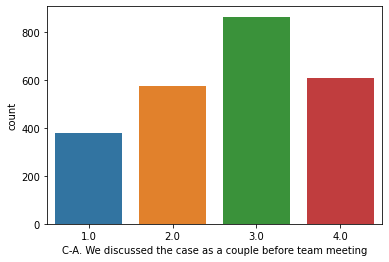

In [14]:
sns.countplot(x = 'C-A. We discussed the case as a couple before team meeting',data = ca_numeric)
print(ca_numeric['C-A. We discussed the case as a couple before team meeting'].value_counts())
plt.savefig('ca_data.png')

In [15]:
ca_data = nlp1[(nlp1['C-A. We discussed the case as a couple before team meeting'] == 'Yes')|
                (nlp1['C-A. We discussed the case as a couple before team meeting']=='No')]
ca_data

,School,CourseName,Class/Form,CourseID,Moderator,Session Date,Year,Course Session Code,Session Name,Session Theme,...,T-B. I attended the team meeting,T-C. My spouse attended the team meeting,T-D. Team meeting took place on a different day before the general session,T-E. Team meeting started and ended at the scheduled time,C-A. We discussed the case as a couple before team meeting,C-B. Our discussion helped us to know each other better,C-C. Our discussion helped us to address our concerns on this topic,I-A. Thoroughly studied the technical note,I-B. Studied the case before discussing with my spouse,"I-C. Technical note is clear, educative and enriching"
977,Kianda,Teenagers,Form 3,KSTe2017,Bernadette Kiarie,25.02.2017,2017,"KSTe2017-3,4","If Only I Could Talk With My Mother, Nobody Un...",EDUCATING IN HUMAN LOVE: HIGH SPIRITS AND SELF...,...,yes,No,yes,yes,No,NaN,NaN,yes,yes,2
3250,Kianda,Teenagers,Form 1,KSTe2020,S.Nganga,08.02.2020,2020,KSTe2020-2,Contradictions of Elizabeth,NaN,...,Yes,Yes,No,Yes,Yes,Yes,3,Yes,Yes,3
3251,Kianda,Teenagers,Form 1,KSTe2020,S.Nganga,08.02.2020,2020,KSTe2020-2,Contradictions of Elizabeth,NaN,...,Yes,Yes,No,No,Yes,Yes,3,Yes,Yes,3
3252,Kianda,Teenagers,Form 1,KSTe2020,S.Nganga,08.02.2020,2020,KSTe2020-2,Contradictions of Elizabeth,NaN,...,Yes,Yes,No,No,No,No,1,Yes,No,3
3253,Kianda,Teenagers,Form 1,KSTe2020,S.Nganga,08.02.2020,2020,KSTe2020-2,Contradictions of Elizabeth,NaN,...,Yes,Yes,No,Yes,Yes,Yes,3,Yes,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,Strathmore School,Married Love,NaN,SSML2020,School Chaplain,15.02.2020,2020,SSML2020-3,Presentation for Authentic human love,NaN,...,Yes,No,No,Yes,No,Yes,4,No,No,3
3556,Strathmore School,Married Love,NaN,SSML2020,School Chaplain,15.02.2020,2020,SSML2020-3,Presentation for Authentic human love,NaN,...,Yes,Yes,Yes,Yes,Yes,Yes,2,No,Yes,3
3557,Strathmore School,Married Love,NaN,SSML2020,School Chaplain,15.02.2020,2020,SSML2020-3,Presentation for Authentic human love,NaN,...,Yes,Yes,No,Yes,No,No,1,No,Yes,4
3558,Strathmore School,Married Love,NaN,SSML2020,School Chaplain,15.02.2020,2020,SSML2020-3,Presentation for Authentic human love,NaN,...,Yes,No,No,Yes,Yes,Yes,4,Yes,No,4


Yes    185
No      80
Name: C-A. We discussed the case as a couple before team meeting, dtype: int64


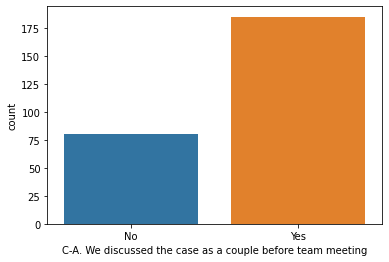

In [16]:
sns.countplot(x = 'C-A. We discussed the case as a couple before team meeting',data = ca_data)
print(ca_data['C-A. We discussed the case as a couple before team meeting'].value_counts())
plt.savefig('ca_yes_no.png')

In [17]:
nlp1['C-C. Our discussion helped us to address our concerns on this topic'].unique()

array([nan, 4, 3, 2, 1, ' ', 'N'], dtype=object)

In [18]:
cc_data = nlp1[(nlp1['C-C. Our discussion helped us to address our concerns on this topic'] != ' ')&
                (nlp1['C-C. Our discussion helped us to address our concerns on this topic']!='N')]

cc_data['C-C. Our discussion helped us to address our concerns on this topic'] = pd.to_numeric(cc_data['C-C. Our discussion helped us to address our concerns on this topic'])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
cc_data['C-C. Our discussion helped us to address our concerns on this topic']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3848    1.0
3849    3.0
3850    1.0
3851    NaN
3852    2.0
Name: C-C. Our discussion helped us to address our concerns on this topic, Length: 3851, dtype: float64

In [20]:
cc_data.describe()

,Year,G-E. The discussions helped to raise and solve problems,G-F. The moderator understands the topic well,G-G. The moderator led the general session well,G-H. This session has been useful in enriching our Family Life,C-C. Our discussion helped us to address our concerns on this topic
count,3851.000000,3727.000000,3743.000000,3743.000000,3729.000000,2558.000000
mean,2018.277071,3.396297,3.647075,3.619022,3.592384,2.866693
std,0.909312,0.660533,0.582294,0.611821,0.607187,0.973955
min,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2018.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,2018.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,2019.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2020.000000,5.000000,5.000000,5.000000,4.000000,4.000000


3    98
4    75
2    57
1    34
Name: C-C. Our discussion helped us to address our concerns on this topic, dtype: int64


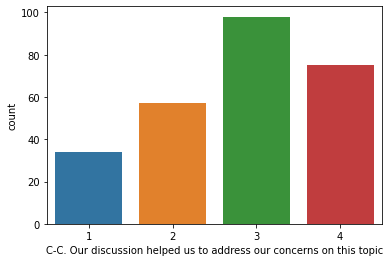

In [21]:
sns.countplot(x = 'C-C. Our discussion helped us to address our concerns on this topic',data = ca_data)
print(ca_data['C-C. Our discussion helped us to address our concerns on this topic'].value_counts())

In [22]:
nlp1['C-B. Our discussion helped us to know each other better'].unique()

array([nan, 3, 4, 1, 2, 'Yes', 'No'], dtype=object)

In [23]:
cb_bin_data = nlp1[(nlp1['C-B. Our discussion helped us to know each other better'] == 'Yes')|
                (nlp1['C-B. Our discussion helped us to know each other better']=='No')]

In [24]:
cb_data = nlp1[(nlp1['C-B. Our discussion helped us to know each other better'] != 'Yes')&
                (nlp1['C-B. Our discussion helped us to know each other better']!='No')]


In [25]:
cb_data['C-B. Our discussion helped us to know each other better'] = pd.to_numeric(cb_data['C-B. Our discussion helped us to know each other better'])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3.0    1023
4.0     713
2.0     495
1.0     289
Name: C-B. Our discussion helped us to know each other better, dtype: int64


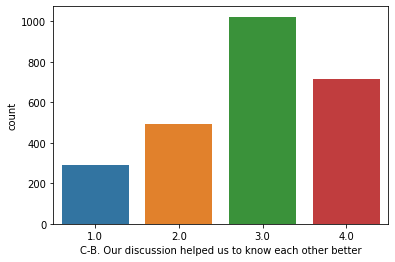

In [26]:
sns.countplot(x ='C-B. Our discussion helped us to know each other better',data = cb_data)
print(cb_data['C-B. Our discussion helped us to know each other better'].value_counts())

In [27]:
cb_data.describe()

,Year,G-E. The discussions helped to raise and solve problems,G-F. The moderator understands the topic well,G-G. The moderator led the general session well,G-H. This session has been useful in enriching our Family Life,C-B. Our discussion helped us to know each other better
count,3589.000000,3465.000000,3481.000000,3481.000000,3467.000000,2520.000000
mean,2018.150460,3.406926,3.654984,3.632002,3.605134,2.857143
std,0.808048,0.653255,0.574515,0.599232,0.595818,0.958150
min,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2018.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,2018.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,2019.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2020.000000,5.000000,5.000000,5.000000,4.000000,4.000000


In [28]:
#cb_bin_data['C-B. Our discussion helped us to know each other better'].replace('Yes',1,inplace =True)
cb_bin_data['C-B. Our discussion helped us to know each other better'].replace('No',0,inplace =True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


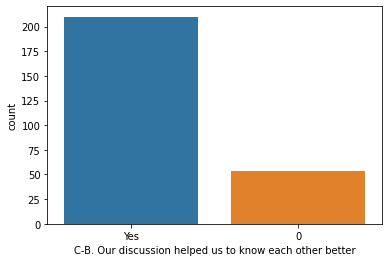

In [29]:
sns.countplot(x = 'C-B. Our discussion helped us to know each other better',data = cb_bin_data)

In [30]:
nlp1['I-C. Technical note is clear, educative and enriching'].unique()

array([nan, 4, 2, 3, 5, ' ', 1, '2&3'], dtype=object)

In [31]:
ic_data = nlp1[(nlp1['I-C. Technical note is clear, educative and enriching'] != ' ')&
             (nlp1['I-C. Technical note is clear, educative and enriching'] != '2&3')]

In [32]:
ic_data['I-C. Technical note is clear, educative and enriching'] = pd.to_numeric(ic_data['I-C. Technical note is clear, educative and enriching'])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
ic_data.describe()

,Year,G-E. The discussions helped to raise and solve problems,G-F. The moderator understands the topic well,G-G. The moderator led the general session well,G-H. This session has been useful in enriching our Family Life,"I-C. Technical note is clear, educative and enriching"
count,3851.000000,3727.000000,3743.000000,3743.000000,3729.000000,3027.000000
mean,2018.277331,3.396566,3.647075,3.619022,3.592384,3.316485
std,0.909376,0.660169,0.582294,0.611821,0.607187,0.690988
min,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2018.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2018.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,2019.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2020.000000,5.000000,5.000000,5.000000,4.000000,5.000000


In [34]:
ic_data['I-C. Technical note is clear, educative and enriching'].isnull().sum()

824

3.0    1375
4.0    1319
2.0     301
1.0      31
5.0       1
Name: I-C. Technical note is clear, educative and enriching, dtype: int64


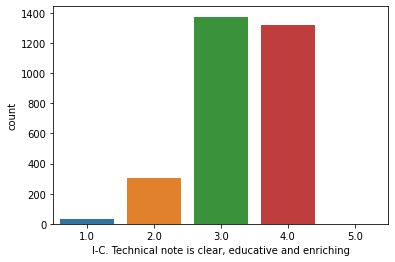

In [35]:
sns.countplot(x = 'I-C. Technical note is clear, educative and enriching',data = ic_data)
print(ic_data['I-C. Technical note is clear, educative and enriching'].value_counts())

In [36]:
!pip install nltk==3.4.5

In [37]:
nlp1['School'].unique()

array(['Kianda', 'Strathmore School ', 'Hodari Boys Club', 'SBS',
       'Strathmore School'], dtype=object)

In [38]:
maisha = pd.read_excel('maishareviewsdata.xlsx', sheet_name='Maisha Data Separately')

In [39]:
maisha.columns

Index(['School', 'CourseName', 'Class/Form', 'CourseID', 'Moderator',
       'Session Date', 'Year', 'Course Session Code', 'Session Name',
       'Session Theme', 'Analysis Basis', 'ParentID[Random]', 'FORM FILLED BY',
       'G-A. My spouse has attended the general session',
       'G-B. The session started and ended at the scheduled time',
       'G-C. Participation was good and discussion interesting',
       'G-D. We have identified the problems in the case and shared possible solutions',
       'G-E. The discussions helped to raise and solve problems',
       'G-F. The moderator understands the topic well',
       'G-G. The moderator led the general session well',
       'G-H. This session has been useful in enriching our Family Life',
       'LESSONS SPECIFICALLY APPRECIATED IN THIS TOPIC. ',
       'SUGGESTIONS FOR IMPROVEMENT.', 'T-A. Our team had a team meeting',
       'T-B. I attended the team meeting',
       'T-C. My spouse attended the team meeting',
       'T-D. Team me

In [40]:
positive_feedback = maisha['LESSONS SPECIFICALLY APPRECIATED IN THIS TOPIC. ']

In [41]:
positive_feedback.isnull().sum()

42

### due to the prescence of nans it is better that we carry out our investigation after dropping the nulls

In [42]:
positive_feedback.dropna(axis = 0,inplace = True)

#### <span style = 'color:red'>punkt</span> is used to tokenize the words and sentences  and takes into consideration the punctuation of every word

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
posis = []
for i in maisha['SUGGESTIONS FOR IMPROVEMENT.']:
    x = str(i)
    posis.append(x)
posis

['nan',
 'Please share the presentation from Branya',
 'nan',
 'Sharing of the powerpoint presentation made by the moderator',
 'Well presented in simple terms',
 'nan',
 'nan',
 'nan',
 'Great discussion.Good powerpoint presentation',
 'An excellent session',
 'nan',
 'Good powerpoint and very informative.The triadic structure was well explained',
 'Make it 15 minutes longer',
 'nan',
 'nan',
 'Make the sessions longer.to allow all groups to interact',
 'nan',
 'It was awesome',
 'Session was informative and interactive',
 'Excelent. Time was short though',
 'Need abit of more time and establish additional ways of engaging the group more directly earlier on.',
 'Very good understanding of the topic. ',
 'nan',
 'nan',
 'nan',
 'Ok',
 'nan',
 'The time was quite limiting,felt there was more.Great job though',
 'It was very informative.Excellent',
 'nan',
 'nan',
 'nan',
 'The time was short for this broad topic',
 'nan',
 'Have two sessions for communication',
 'nan',
 'nan',
 'the mod

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

In [47]:
english_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
posis_no_stop = remove_stop_words(posis)


In [49]:
posis_no_stop

['nan',
 'Please share presentation Branya',
 'nan',
 'Sharing powerpoint presentation made moderator',
 'Well presented simple terms',
 'nan',
 'nan',
 'nan',
 'Great discussion.Good powerpoint presentation',
 'An excellent session',
 'nan',
 'Good powerpoint informative.The triadic structure well explained',
 'Make 15 minutes longer',
 'nan',
 'nan',
 'Make sessions longer.to allow groups interact',
 'nan',
 'It awesome',
 'Session informative interactive',
 'Excelent. Time short though',
 'Need abit time establish additional ways engaging group directly earlier on.',
 'Very good understanding topic.',
 'nan',
 'nan',
 'nan',
 'Ok',
 'nan',
 'The time quite limiting,felt more.Great job though',
 'It informative.Excellent',
 'nan',
 'nan',
 'nan',
 'The time short broad topic',
 'nan',
 'Have two sessions communication',
 'nan',
 'nan',
 'moderators need state clearly need speakers.',
 'topic like corner stone',
 '_',
 'Give even time',
 'All good',
 'Technical notes expounded much',


In [50]:
posis_no_punc = []
for x in posis_no_stop: #this is Df_pd for Df_np (text[:])
    new_text = re.sub('<.*?>', '', x)   # remove HTML tags
    new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
    new_text = re.sub(r'\d+','',new_text)# remove numbers
    new_text = new_text.lower() # lower case, .upper() for upper          
    if new_text != '':
        posis_no_punc.append(new_text)

In [51]:
posis_no_punc

['nan',
 'please share presentation branya',
 'nan',
 'sharing powerpoint presentation made moderator',
 'well presented simple terms',
 'nan',
 'nan',
 'nan',
 'great discussiongood powerpoint presentation',
 'an excellent session',
 'nan',
 'good powerpoint informativethe triadic structure well explained',
 'make  minutes longer',
 'nan',
 'nan',
 'make sessions longerto allow groups interact',
 'nan',
 'it awesome',
 'session informative interactive',
 'excelent time short though',
 'need abit time establish additional ways engaging group directly earlier on',
 'very good understanding topic',
 'nan',
 'nan',
 'nan',
 'ok',
 'nan',
 'the time quite limitingfelt moregreat job though',
 'it informativeexcellent',
 'nan',
 'nan',
 'nan',
 'the time short broad topic',
 'nan',
 'have two sessions communication',
 'nan',
 'nan',
 'moderators need state clearly need speakers',
 'topic like corner stone',
 '_',
 'give even time',
 'all good',
 'technical notes expounded much',
 '_',
 '_',


#### lemmatizing the data

In [52]:
lemmatizer = WordNetLemmatizer() 

In [53]:
def nltk2wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [54]:
nltk.pos_tag(['responsibility'])

[('responsibility', 'NN')]

In [55]:
lemmatizer = WordNetLemmatizer()

In [56]:
def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
    res_words = []
    for word, tag in wn_tagged:
        if tag is None:            
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return " ".join(res_words)

In [57]:
posis_lemm = []
for i in posis_no_punc:
    x = lemmatize_sentence(i)
    posis_lemm.append(x)
posis_lemm

['nan',
 'please share presentation branya',
 'nan',
 'share powerpoint presentation make moderator',
 'well present simple term',
 'nan',
 'nan',
 'nan',
 'great discussiongood powerpoint presentation',
 'an excellent session',
 'nan',
 'good powerpoint informativethe triadic structure well explain',
 'make minute longer',
 'nan',
 'nan',
 'make session longerto allow group interact',
 'nan',
 'it awesome',
 'session informative interactive',
 'excelent time short though',
 'need abit time establish additional way engage group directly earlier on',
 'very good understanding topic',
 'nan',
 'nan',
 'nan',
 'ok',
 'nan',
 'the time quite limitingfelt moregreat job though',
 'it informativeexcellent',
 'nan',
 'nan',
 'nan',
 'the time short broad topic',
 'nan',
 'have two session communication',
 'nan',
 'nan',
 'moderator need state clearly need speaker',
 'topic like corner stone',
 '_',
 'give even time',
 'all good',
 'technical note expound much',
 '_',
 '_',
 '_',
 'time seem li

In [84]:
preprocessing_reviews = pd.DataFrame()
#preprocessing_reviews['initial_reviews'] = positive_feedback
preprocessing_reviews['removing_punctuation'] = posis_no_punc
preprocessing_reviews['removed_stop_words'] = posis_no_stop
preprocessing_reviews['removing_lemm'] = posis_lemm

ValueError: Length of values does not match length of index

In [58]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3),stop_words={'english'})

In [59]:
ngram_vector = []
ngram_vectorizer.fit(posis_lemm)
X = ngram_vectorizer.transform(posis_lemm)
keys = ngram_vectorizer.vocabulary_.values()

In [60]:
words = ngram_vectorizer.get_feature_names()
bag_of_words = pd.DataFrame(X.todense(),columns = words)

In [61]:
for i in words:
    if len(re.findall(r'\w+',i))>1 and len(re.findall(r'\w+',i))<3:
        print(i)

abit cold
abit hurry
abit time
able give
able tie
access communication
access email
action emotinal
activity include
add topic
add vigour
additional level
additional time
additional way
address issue
address topic
adequate time
advance well
afternoon sunny
age group
aidsstructured talk
airconditioned room
all go
all good
allocate certain
allocate session
allocate time
allot time
allow conclusion
allow group
allow interrogation
allow people
allow time
allows class
alls good
along able
along file
also get
also material
also people
also share
amnoon be
an excellent
an ordered
anable participant
analysis complex
analysis meditation
and please
animatedoutgoing draw
answer satisfactorily
answer wrong
antony nzamuhopefulltat
application topic
apply everything
appreciate topic
approach this
appropriate venue
areakarura farextra
argument get
around participant
arrange audioloudspeaker
arrangement have
arrangement shuffle
arrive bit
arrive session
arrive there
as session
aside interactive
aspect

In [62]:
reviews_df = pd.DataFrame()
reviews_df['Positive reviews'] = bag_of_words.columns

In [63]:
sums = [] 
cols1 = bag_of_words.columns
for i in cols1:
    sums.append(bag_of_words[i].sum())
reviews_df['sums'] = sums

In [64]:
reviews_df

,Positive reviews,sums
0,abit,4
1,abit cold,1
2,abit hurry,1
3,abit hurry good,1
4,abit time,1
...,...,...
2921,would really help,1
2922,wrong,1
2923,wrong moderator,1
2924,wrong moderator intimidate,1


In [65]:
bigrams = []
for words in reviews_df['Positive reviews']:
    if len(re.findall(r'\w+',words))>1 and len(re.findall(r'\w+',words))<3:
        bigrams.append(words)

In [66]:
for i in bigrams:
    if 'sex' in i:
        print(i)

matter sexual
sexual intimacy


In [67]:
bigrams_df = reviews_df[reviews_df['Positive reviews'].isin(bigrams)]

In [68]:
bigrams_df.to_excel('new_fucking_work2.xlsx')

In [69]:
trigrams = []
for words in reviews_df['Positive reviews']:
    if len(re.findall(r'\w+',words))>2:
        trigrams.append(words)


In [70]:
trigrams_df = reviews_df[reviews_df['Positive reviews'].isin(trigrams)]
trigrams_df

,Positive reviews,sums
3,abit hurry good,1
5,abit time establish,1
8,able give view,1
10,able tie case,1
13,access communication maisha,1
...,...,...
2916,would nice close,1
2918,would preferredymcai understand,1
2920,would really appreciate,1
2921,would really help,1


In [71]:
conda install pandas textblob nltk wordcloud seaborn

^C

Note: you may need to restart the kernel to use updated packages.


In [72]:
from wordcloud import WordCloud

In [73]:
bixx = []
for i in bigrams_df['Positive reviews']:
    bix = str(i)
    bixx.append(bix)

In [74]:
words = ngram_vectorizer.get_feature_names()

In [75]:
words

['abit',
 'abit cold',
 'abit hurry',
 'abit hurry good',
 'abit time',
 'abit time establish',
 'able',
 'able give',
 'able give view',
 'able tie',
 'able tie case',
 'access',
 'access communication',
 'access communication maisha',
 'access email',
 'access email often',
 'action',
 'action emotinal',
 'action emotinal intelligence',
 'activition',
 'activity',
 'activity include',
 'add',
 'add topic',
 'add vigour',
 'add vigour energy',
 'additional',
 'additional level',
 'additional level depth',
 'additional time',
 'additional time incorporate',
 'additional way',
 'additional way engage',
 'address',
 'address issue',
 'address issue case',
 'address topic',
 'adequate',
 'adequate time',
 'adequate time discus',
 'administration',
 'advance',
 'advance well',
 'advance well time',
 'afternoon',
 'afternoon sunny',
 'afternoon sunny thirst',
 'age',
 'age group',
 'age group circumstance',
 'aid',
 'aidsstructured',
 'aidsstructured talk',
 'aidsstructured talk pointsaddit

In [76]:
comm = ' '
for i in words:
    comm = comm +i +' '
    


In [77]:
comm

' abit abit cold abit hurry abit hurry good abit time abit time establish able able give able give view able tie able tie case access access communication access communication maisha access email access email often action action emotinal action emotinal intelligence activition activity activity include add add topic add vigour add vigour energy additional additional level additional level depth additional time additional time incorporate additional way additional way engage address address issue address issue case address topic adequate adequate time adequate time discus administration advance advance well advance well time afternoon afternoon sunny afternoon sunny thirst age age group age group circumstance aid aidsstructured aidsstructured talk aidsstructured talk pointsadditional airconditioned airconditioned room airconditioned room improve all all go all go well all good allocate allocate certain allocate certain case allocate session allocate time allot allot time allot time also

In [78]:
char_mask = np.array(Image.open("kianda.jfif"))    
image_colors = ImageColorGenerator(char_mask)

FileNotFoundError: [Errno 2] No such file or directory: 'kianda.jfif'

In [ ]:
plt.figure(figsize = (16,10))
wc = WordCloud(background_color="white",width=1000, height=1000, mask=char_mask, random_state=1).generate(comm)# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors))
#plt.savefig('kianda1_words.jpg')

 wordcloud = WordCloud(width = 1440, height= 1080,
                       max_words=100,background_color='white',collocations= 'False').generate(comm)

In [ ]:
help(WordCloud.generate)

In [ ]:
plt.figure(figsize = (16,10))
plt.imshow(wordcloud)


In [ ]:
bigrams_df.to_csv('bigrams.csv')
trigrams_df.to_csv('trigrams.csv')

# <span style = 'color:red'>Topic Modelling Analysis</span>

In [3]:
!pip install pyLDAvis

In [4]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this


# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [8]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [10]:
tokenized_data = list(sent_to_words(nlp1['LESSONS SPECIFICALLY APPRECIATED IN THIS TOPIC. ']))

In [11]:
print(tokenized_data[:1])

[['character', 'temperaments', 'and', 'education']]


In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(tokenized_data, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[tokenized_data], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[tokenized_data[8]]])

['responsibility', 'self', 'management', 'and', 'respect', 'for', 'others']


In [13]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [14]:
data_words_nostops = remove_stopwords(tokenized_data)


In [15]:
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_bigrams

[['character', 'temperaments', 'education'],
 ['self', 'control', 'responsibility', 'kids'],
 ['focus', 'taking', 'right', 'actions'],
 ['nan'],
 ['nan'],
 ['children', 'rights', 'responsibility'],
 ['identify',
  'temperaments',
  'strengths',
  'weaknesses',
  'deal',
  'self',
  'family'],
 ['nan'],
 ['responsibility', 'self', 'management', 'respect', 'others'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['managing', 'emotions', 'work', 'relationships'],
 ['child', 'temperaments'],
 ['shape',
  'child',
  'character',
  'understand',
  'child',
  'temperaments',
  'three',
  'key',
  'aspects',
  'life'],
 ['intellect', 'key', 'things', 'shaping', 'character'],
 ['moderator', 'knowledgeable', 'easily', 'practical', 'examples'],
 ['importance', 'building', 'character', 'young', 'age'],
 ['importance', 'temperaments', 'character'],
 ['nan'],
 ['impact', 'influence', 'temperaments', 'behavior', 'character', 'daughter'],
 ['good', 'parenting', 'skills', 'able', 'identify', 'character', 'person'],
 

In [16]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [17]:
data_lemmatized = lemmatization(data_words_bigrams, 
                                allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [18]:
print(data_lemmatized[:20])

[['character', 'temperament', 'education'], ['self', 'responsibility', 'kid'], ['focus', 'take', 'right', 'action'], [], [], ['child', 'responsibility'], ['identify', 'temperament', 'strength', 'weakness', 'deal', 'self', 'family'], [], ['responsibility', 'self', 'management', 'respect', 'other'], [], [], [], ['manage', 'emotion', 'work', 'relationship'], ['child', 'temperament'], ['shape', 'child', 'character', 'understand', 'child', 'temperament', 'key', 'aspect', 'life'], ['intellect', 'key', 'thing', 'shape', 'character'], ['moderator', 'knowledgeable', 'easily', 'practical', 'example'], ['importance', 'building', 'character', 'young', 'age'], ['importance', 'temperament', 'character'], []]


In [19]:
id2word = corpora.Dictionary(data_lemmatized)


In [20]:
# Create Corpus
texts = data_lemmatized

In [21]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
##we determine the number of times a word has appeared in a sentence

In [22]:
print(corpus[:20])

[[(0, 1), (1, 1), (2, 1)], [(3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1), (9, 1)], [], [], [(4, 1), (10, 1)], [(2, 1), (5, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [], [(4, 1), (5, 1), (16, 1), (17, 1), (18, 1)], [], [], [], [(19, 1), (20, 1), (21, 1), (22, 1)], [(2, 1), (10, 1)], [(0, 1), (2, 1), (10, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(0, 1), (24, 1), (26, 1), (28, 1), (29, 1)], [(30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(0, 1), (35, 1), (36, 1), (37, 1), (38, 1)], [(0, 1), (2, 1), (37, 1)], []]


In [23]:
id2word[33]

'moderator'

In [24]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('character', 1), ('education', 1), ('temperament', 1)]]

In [25]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=200,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [26]:
pprint(lda_model.print_topics())

##the output shows how the top 10 key words(from passes) contribute to a 
##given topic

[(0,
  '0.154*"communication" + 0.101*"marriage" + 0.072*"understand" + '
  '0.042*"importance" + 0.041*"communicate" + 0.030*"difference" + '
  '0.029*"appreciate" + 0.028*"son" + 0.022*"learn" + 0.021*"couple"'),
 (1,
  '0.110*"child" + 0.065*"teenager" + 0.064*"parent" + 0.046*"need" + '
  '0.033*"different" + 0.032*"teen" + 0.031*"deal" + 0.028*"money" + '
  '0.023*"temperament" + 0.019*"discipline"'),
 (2,
  '0.076*"issue" + 0.040*"woman" + 0.036*"well" + 0.033*"man" + '
  '0.033*"control" + 0.024*"presentation" + 0.023*"experience" + '
  '0.023*"question" + 0.022*"talk" + 0.017*"take"'),
 (3,
  '0.055*"key" + 0.036*"create" + 0.031*"problem" + 0.029*"especially" + '
  '0.028*"time" + 0.027*"topic" + 0.025*"personality" + 0.024*"management" + '
  '0.023*"age" + 0.023*"matter"'),
 (4,
  '0.108*"love" + 0.051*"work" + 0.033*"relationship" + 0.027*"discussion" + '
  '0.027*"sex" + 0.027*"sexuality" + 0.027*"manage" + 0.021*"sexual" + '
  '0.020*"education" + 0.018*"good"'),
 (5,
  '0

In [27]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.828993672015888

Coherence Score:  0.5229411399441456


In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.391822 -0.003988       1        1  24.305819
5      0.063850  0.115006       2        1  15.249891
0      0.060973  0.292508       3        1  14.507051
4      0.018558 -0.165109       4        1  14.451530
6      0.103740 -0.178674       5        1  10.814079
2      0.064650  0.023266       6        1  10.434340
3      0.080052 -0.083010       7        1  10.237286, topic_info=               Term        Freq       Total Category  logprob  loglift
12           family  304.000000  304.000000  Default  30.0000  30.0000
112   communication  284.000000  284.000000  Default  29.0000  29.0000
10            child  338.000000  338.000000  Default  28.0000  28.0000
107            love  198.000000  198.000000  Default  27.0000  27.0000
319        marriage  185.000000  185.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
1367        deliver   12.327158   13.077086   Topic7  -4.6566   2.2201
234     appropriate   11.922766   12.668034   Topic7  -4.6900   2.2185
166            look   11.654909   12.396475   Topic7  -4.7127   2.2174
1162       teamwork   11.877460   12.655115   Topic7  -4.6938   2.2157
87             time   36.078594  138.754089   Topic7  -3.5827   0.9321

[252 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
899       5  0.982039       access
309       6  0.966463      address
824       2  0.934598    affection
1642      1  0.966716       affirm
1305      4  0.933609  affirmation
...     ...       ...          ...
146       6  0.977171         well
183       4  0.957161         wife
138       6  0.987480        woman
22        4  0.997453         work
240       7  0.943531         year

[224 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 1, 5, 7, 3, 4])

In [ ]:
column = nlp1.columns
y = input()
for i in column:
    if i == y:
        print('woooow!')

In [ ]:
courses = nlp1['CourseName'].unique()

In [ ]:
for lessons in courses:
    data22 = nlp1[nlp1['CourseName']==lessons]
    locals()['{}_reviews'.format(lessons.replace(" ",""))]= data22['LESSONS SPECIFICALLY APPRECIATED IN THIS TOPIC. ']
    print('{}_reviews'.format(lessons.replace(" ","")))

In [ ]:
nlp1.columns

In [ ]:
nlp1.columns

### creating a function to analyze our whole data set

In [ ]:
from wordcloud import WordCloud

In [ ]:
desired_filter2 = input()

In [ ]:
for filters in nlp1[desired_filter]:
    if  nlp1[desired_filter2].any() == 'Adolescence':
        print(filters)
            

In [ ]:
dups = nlp1[nlp1['ParentID[Random]'].duplicated()]

In [ ]:
dups['ParentID[Random]'].value_counts()

In [ ]:
nlp1['GENDER'].unique()

In [ ]:
nlp1['GENDER'].replace({' Female':'Female','Male ':'Male','Husband:':'Male','female':'Female',
                       'Wife:':'Female'},inplace=True)

In [ ]:
nlp1['School'].replace({'Strathmore School ':'Strathmore School'}, inplace = True)

In [ ]:
for i,x in zip(nlp1.School,nlp1.CourseName):
    y = next(nlp1[(nlp1.School == i) & (nlp1.CourseName == x)])
    print(y)
    

In [ ]:
cc = nlp1[['CourseName','School']]

In [ ]:
cc.School.unique()

In [ ]:
cc.CourseName.unique()

In [ ]:
data22 = pd.DataFrame()
for a in nlp1['CourseName'].unique():
    for b in nlp1['School'].unique():
        for c in nlp1['Year'].unique():
            x = nlp1[(nlp1['CourseName'] ==a)&(nlp1['School']==b)&(nlp1['Year']==c)]
            print(x)
    

In [ ]:
data22.to_csv('midnight.csv')

In [ ]:
from itertools import product

for i, j in zip(*[cc.School,cc.CourseName]):
    data22 = cc[(cc.School ==i) & (cc.CourseName == j)]
    print(data22)
   
    
    

In [ ]:
new_df = pd.crosstab(nlp1['Year'],nlp1['CourseName'])
new_df

In [ ]:
nlp2 = pd.read_excel('PFDConsolidatedSessionReviewdata 2013-2020 WIP.xlsx',sheet_name='Raw data')
nlp2.head(2)

In [ ]:
bb.get_group('Married Love')

In [ ]:
nlp2['ParentID[Random]'].drop_duplicates(inplace = True)

In [ ]:
nlp2['ParentID[Random]'].duplicated().sum()

In [ ]:
nlp2['FORM FILLED BY'].isnull().sum()

In [ ]:
nlp2.columns

In [ ]:
for statements in nlp2['LESSONS SPECIFICALLY APPRECIATED IN THIS TOPIC. '].isnull():
    if statements == True:
        nlp2['review_count']=0
    



In [ ]:
gender_data = nlp2[['FORM FILLED BY','LESSONS SPECIFICALLY APPRECIATED IN THIS TOPIC. ','SUGGESTIONS FOR IMPROVEMENT.']]

In [ ]:
desired_column = input()

In [ ]:
def gender_analysis(data):
    data.dropna(inplace = True)
    ID_bigrams_final_df = pd.DataFrame()
    ID_trigrams_final_df = pd.DataFrame()
    for genders in data['FORM FILLED BY'].unique():
        data22 = data[data['FORM FILLED BY']==genders]
        locals()['{}_reviews'.format(genders.replace(" ",""))]= data22[desired_column]
        list1 = ['{}_reviews'.format(genders.replace(" ",""))]
        
        for i in list1:
            globals()['{}_posis'.format(i)] = []
                    #print('{}_posis'.format(i))
            
        for feedback in locals()['{}_reviews'.format(genders.replace(" ",""))]:
            x = str(feedback)
            globals()['{}_posis'.format(i)].append(x)
                
                ####we have now converted the texts to strings
                ####now we have to remove all the stopwords in our model
               
        english_stop_words = stopwords.words('english')
                
        def remove_stop_words(corpus):
            removed_stop_words = []
            for review in corpus:
                removed_stop_words.append(
                ' '.join([word for word in review.split() 
                if word not in english_stop_words])
                    )
            return removed_stop_words
                
        globals()['{}_no_stop'.format(i.split('_')[0])] = remove_stop_words(globals()['{}_posis'.format(i)])
            
            ####removing punctuations
        globals()['{}_no_punc'.format(i.split('_')[0])] = []
        for x in globals()['{}_no_stop'.format(i.split('_')[0])]: #this is Df_pd for Df_np (text[:])
            new_text = re.sub('<.*?>', '', x)   # remove HTML tags
            new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
            new_text = re.sub(r'\d+','',new_text)# remove numbers
            new_text = new_text.lower() # lower case, .upper() for upper          
            if new_text != '':
                globals()['{}_no_punc'.format(i.split('_')[0])].append(new_text)
                    
            
        lemmatizer = WordNetLemmatizer()
        def nltk2wn_tag(nltk_tag):
            if nltk_tag.startswith('J'):
                return wordnet.ADJ
            elif nltk_tag.startswith('V'):
                return wordnet.VERB
            elif nltk_tag.startswith('N'):
                return wordnet.NOUN
            elif nltk_tag.startswith('R'):
                return wordnet.ADV
            else:          
                return None
            ###removing the nulls
        globals()['{}_no_punc'.format(i.split('_')[0])] = [x for x in globals()['{}_no_punc'.format(i.split('_')[0])] if str(x) != 'nan']
            
        def lemmatize_sentence(sentence):
            nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
            wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
            res_words = []
            for word, tag in wn_tagged:
                if tag is None:            
                    res_words.append(word)
                else:
                    res_words.append(lemmatizer.lemmatize(word, tag))
            return " ".join(res_words)
            
            ##lemmatizing our sentences
        globals()['{}_lemm'.format(i.split('_')[0])] = []
        for no_punc in globals()['{}_no_punc'.format(i.split('_')[0])]:
            x = lemmatize_sentence(no_punc)
            globals()['{}_lemm'.format(i.split('_')[0])].append(x)
                
        try:
            ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3),stop_words={'english'})
            globals()['{}_ngrams'.format(i.split('_')[0])] = []
                    #ngram_vectorizer.fit(globals()['{}_lemm'.format(i.split('_')[0])])
            X = ngram_vectorizer.fit_transform(globals()['{}_lemm'.format(i.split('_')[0])])
        except ValueError:
            continue
            ##tokenizing our data 

        globals()['{}_ngram_words'.format(i.split('_')[0])] = ngram_vectorizer.get_feature_names()
              
        globals()['{}_bow_df'.format(i.split('_')[0])] = pd.DataFrame(X.todense(),columns = globals()['{}_ngram_words'.format(i.split('_')[0])])
            
        globals()['{}_ngrams_df'.format(i.split('_')[0])] = pd.DataFrame()
            
        globals()['{}_ngrams_df'.format(i.split('_')[0])]['words'] = globals()['{}_bow_df'.format(i.split('_')[0])].columns
        globals()['{}_ngrams_df'.format(i.split('_')[0])]['gender'] = genders
        
            
        globals()['{}_word_frequency'.format(i.split('_')[0])] = [] 
        globals()['{}_word_list'.format(i.split('_')[0])] = globals()['{}_bow_df'.format(i.split('_')[0])].columns
        for xy in globals()['{}_word_list'.format(i.split('_')[0])]:
            globals()['{}_word_frequency'.format(i.split('_')[0])].append(globals()['{}_bow_df'.format(i.split('_')[0])][xy].sum())
            
        globals()['{}_ngrams_df'.format(i.split('_')[0])]['frequency'] = globals()['{}_word_frequency'.format(i.split('_')[0])]
            
            
            ###extracting the bigrams and trigrams for the text
            ###strating off with the bigrams
        globals()['{}_bigrams'.format(i.split('_')[0])] = []
            
        for wordings in globals()['{}_ngrams_df'.format(i.split('_')[0])]['words']:
            if len(re.findall(r'\w+',wordings))>1 and len(re.findall(r'\w+',wordings))<3:
                globals()['{}_bigrams'.format(i.split('_')[0])].append(wordings) 
                    
                    
            ###now extracting the bigrams
        globals()['{}_trigrams'.format(i.split('_')[0])] = []
            
        for wordings in globals()['{}_ngrams_df'.format(i.split('_')[0])]['words']:
            if len(re.findall(r'\w+',wordings))>2:
                globals()['{}_trigrams'.format(i.split('_')[0])].append(wordings)
            
            ##creating the dataframes that contain bigrams and trigrams
            
        globals()['{}_trigrams_df'.format(i.split('_')[0])] = globals()['{}_ngrams_df'.format(i.split('_')[0])][globals()['{}_ngrams_df'.format(i.split('_')[0])]['words'].isin(globals()['{}_trigrams'.format(i.split('_')[0])])]
        globals()['{}_bigrams_df'.format(i.split('_')[0])] = globals()['{}_ngrams_df'.format(i.split('_')[0])][globals()['{}_ngrams_df'.format(i.split('_')[0])]['words'].isin(globals()['{}_bigrams'.format(i.split('_')[0])])]
            #globals()['{}_bigrams_df'.format(i.split('_')[0])].to_csv('{}_bigrams_df'.format(i.split('_')[0]) +".csv" )   
            
        ID_trigrams_final_df = ID_trigrams_final_df.append(globals()['{}_trigrams_df'.format(i.split('_')[0])])
        ID_bigrams_final_df = ID_bigrams_final_df.append(globals()['{}_bigrams_df'.format(i.split('_')[0])])
            
        ID_trigrams_final_df.to_excel('gender_trigramssug.xlsx')
        ID_bigrams_final_df.to_excel('gender_bigramssug.xlsx')
    return ID_trigrams_final_df

In [ ]:
gender_analysis(gender_data)

In [ ]:
nlp2[['LESSONS SPECIFICALLY APPRECIATED IN THIS TOPIC. ','review_count']]

In [ ]:
nlp2.drop(['review_count'], axis = 1,inplace = True)

# STAAART HERE

In [7]:
## inputing the desired column
desired_column = input()

LESSONS SPECIFICALLY APPRECIATED IN THIS TOPIC. 


In [8]:
course = input()

CourseName


In [ ]:
year = input()

In [ ]:
School = input()


In [ ]:
Analysis = input()

In [18]:
#nltk.download('stopwords')

def analyzing_reviews(data2):
    import string
    
    bigrams_df = []
    ID_bigrams_final_df = pd.DataFrame()
    ID_trigrams_final_df = pd.DataFrame()
    
    ####using our filter column so that we slice obtain the reviews per the given review column
    count = 0

    for courses in data2[course].unique():
        for schools in data2[School].unique():
            for years in data2[year].unique():
                for anal in data2[Analysis].unique()
                data22 = data2[(data2[course] == courses)&(data2[School]==schools)&(data2[year]== years)&(data2[Analysis] == anal)] 
        
                locals()['{}_reviews'.format(courses.replace(" ",""))]= data22[desired_column]
                list1 = ['{}_reviews'.format(courses.replace(" ",""))]
        
                for i in list1:
                    globals()['{}_posis'.format(i)] = []
                    #print('{}_posis'.format(i))
            
                for feedback in locals()['{}_reviews'.format(courses.replace(" ",""))]:
                    x = str(feedback)
                    globals()['{}_posis'.format(i)].append(x)
                
                ####we have now converted the texts to strings
                ####now we have to remove all the stopwords in our model
               
                english_stop_words = stopwords.words('english')
                
                def remove_stop_words(corpus):
                    removed_stop_words = []
                    for review in corpus:
                        removed_stop_words.append(
                        ' '.join([word for word in review.split() 
                        if word not in english_stop_words])
                    )
                    return removed_stop_words
                
                globals()['{}_no_stop'.format(i.split('_')[0])] = remove_stop_words(globals()['{}_posis'.format(i)])
            
            ####removing punctuations
                globals()['{}_no_punc'.format(i.split('_')[0])] = []
                for x in globals()['{}_no_stop'.format(i.split('_')[0])]: #this is Df_pd for Df_np (text[:])
                    new_text = re.sub('<.*?>', ' ', x)   # remove HTML tags
                    new_text = re.sub(r'[^\w\s]', ' ', new_text) # remove punc.
                    new_text = re.sub(r'\d+',' ',new_text)# remove numbers
                    new_text = new_text.lower() # lower case, .upper() for upper          
                    if new_text != '':
                        globals()['{}_no_punc'.format(i.split('_')[0])].append(new_text)
                    
            
                lemmatizer = WordNetLemmatizer()
                def nltk2wn_tag(nltk_tag):
                    if nltk_tag.startswith('J'):
                        return wordnet.ADJ
                    elif nltk_tag.startswith('V'):
                        return wordnet.VERB
                    elif nltk_tag.startswith('N'):
                        return wordnet.NOUN
                    elif nltk_tag.startswith('R'):
                        return wordnet.ADV
                    else:          
                        return None
            ###removing the nulls
                globals()['{}_no_punc'.format(i.split('_')[0])] = [x for x in globals()['{}_no_punc'.format(i.split('_')[0])] if str(x) != 'nan']
            
                def lemmatize_sentence(sentence):
                    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
                    wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
                    res_words = []
                    for word, tag in wn_tagged:
                        if tag is None:            
                            res_words.append(word)
                        else:
                            res_words.append(lemmatizer.lemmatize(word, tag))
                    return " ".join(res_words)
            
            ##lemmatizing our sentences
                globals()['{}_lemm'.format(i.split('_')[0])] = []
                for no_punc in globals()['{}_no_punc'.format(i.split('_')[0])]:
                    x = lemmatize_sentence(no_punc)
                    globals()['{}_lemm'.format(i.split('_')[0])].append(x)
                
                try:
                    ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3),stop_words={'english'})
                    globals()['{}_ngrams'.format(i.split('_')[0])] = []
                    #ngram_vectorizer.fit(globals()['{}_lemm'.format(i.split('_')[0])])
                    X = ngram_vectorizer.fit_transform(globals()['{}_lemm'.format(i.split('_')[0])])
                except ValueError:
                    continue
            ##tokenizing our data 
            
            
            ##condensing them to a bag of words format
            
                globals()['{}_ngram_words'.format(i.split('_')[0])] = ngram_vectorizer.get_feature_names()
              
                globals()['{}_bow_df'.format(i.split('_')[0])] = pd.DataFrame(X.todense(),columns = globals()['{}_ngram_words'.format(i.split('_')[0])])
            
                globals()['{}_ngrams_df'.format(i.split('_')[0])] = pd.DataFrame()
            
                globals()['{}_ngrams_df'.format(i.split('_')[0])]['words'] = globals()['{}_bow_df'.format(i.split('_')[0])].columns
                globals()['{}_ngrams_df'.format(i.split('_')[0])]['course'] = courses
                globals()['{}_ngrams_df'.format(i.split('_')[0])]['year'] = years
                globals()['{}_ngrams_df'.format(i.split('_')[0])]['School'] = schools
                globals()['{}_ngrams_df'.format(i.split('_')[0])]['Analysis'] = a
                
            
            
            
                globals()['{}_word_frequency'.format(i.split('_')[0])] = [] 
                globals()['{}_word_list'.format(i.split('_')[0])] = globals()['{}_bow_df'.format(i.split('_')[0])].columns
                for xy in globals()['{}_word_list'.format(i.split('_')[0])]:
                    globals()['{}_word_frequency'.format(i.split('_')[0])].append(globals()['{}_bow_df'.format(i.split('_')[0])][xy].sum())
            
                globals()['{}_ngrams_df'.format(i.split('_')[0])]['frequency'] = globals()['{}_word_frequency'.format(i.split('_')[0])]
            
            
            ###extracting the bigrams and trigrams for the text
            ###strating off with the bigrams
                globals()['{}_bigrams'.format(i.split('_')[0])] = []
            
                for wordings in globals()['{}_ngrams_df'.format(i.split('_')[0])]['words']:
                    if len(re.findall(r'\w+',wordings))>1 and len(re.findall(r'\w+',wordings))<3:
                        globals()['{}_bigrams'.format(i.split('_')[0])].append(wordings) 
                    
                    
            ###now extracting the bigrams
                globals()['{}_trigrams'.format(i.split('_')[0])] = []
            
                for wordings in globals()['{}_ngrams_df'.format(i.split('_')[0])]['words']:
                    if len(re.findall(r'\w+',wordings))>2:
                        globals()['{}_trigrams'.format(i.split('_')[0])].append(wordings)
            
            ##creating the dataframes that contain bigrams and trigrams
            
                globals()['{}_trigrams_df'.format(i.split('_')[0])] = globals()['{}_ngrams_df'.format(i.split('_')[0])][globals()['{}_ngrams_df'.format(i.split('_')[0])]['words'].isin(globals()['{}_trigrams'.format(i.split('_')[0])])]
                globals()['{}_bigrams_df'.format(i.split('_')[0])] = globals()['{}_ngrams_df'.format(i.split('_')[0])][globals()['{}_ngrams_df'.format(i.split('_')[0])]['words'].isin(globals()['{}_bigrams'.format(i.split('_')[0])])]
            #globals()['{}_bigrams_df'.format(i.split('_')[0])].to_csv('{}_bigrams_df'.format(i.split('_')[0]) +".csv" )   
            
                ID_trigrams_final_df = ID_trigrams_final_df.append(globals()['{}_trigrams_df'.format(i.split('_')[0])])
                ID_bigrams_final_df = ID_bigrams_final_df.append(globals()['{}_bigrams_df'.format(i.split('_')[0])])
            
                ID_trigrams_final_df.to_excel('presentation_trigrams1.xlsx')
                ID_bigrams_final_df.to_excel('presentation_bigrams1.xlsx')
    return ID_trigrams_final_df
            
            #bigrams_final_df.to_excel('bigrams_final_new.xlsx')
            #globals()['{}_bigrams_df'.format(i.split('_')[0])].reindex(range(0,globals()['{}_bigrams_df'.format(i.split('_')[0])].shape[0],
       
        
    
    
   
        
        
    
            

In [ ]:
gender_stop_words

In [19]:
analyzing_reviews(nlp1)

,words,course,year,School,frequency
6,affect family interact,Adolescence,2017.0,Kianda,1
9,allow child achieve,Adolescence,2017.0,Kianda,1
12,also spiritual the,Adolescence,2017.0,Kianda,1
15,basis bring adolescence,Adolescence,2017.0,Kianda,1
18,best encounter course,Adolescence,2017.0,Kianda,1
...,...,...,...,...,...
264,unity husband wife,Married Love,2020.0,Kianda,1
267,very open discussion,Married Love,2020.0,Kianda,1
271,wife cycle hormone,Married Love,2020.0,Kianda,1
273,wife per god,Married Love,2020.0,Kianda,1


In [ ]:
outlist = [ (i, j)
    for i in nlp1.School
    for j in nlp1.CourseName]
print(outlist)

In [ ]:
import itertools

In [ ]:
bb = pd.DataFrame(itertools.product(nlp1['School'],nlp1['CourseName']))

In [ ]:
bb[bb[0]== 'SBS']

In [ ]:
bb.to_excel('bb.xlsx'

In [ ]:
bb

In [ ]:
course_school = nlp1[['CourseName','School']]

In [ ]:
for course, schools in zip(course_school['CourseName'],course_school['School']):
    data22 = course_school[(course_school.CourseName == course) & (course_school['School']==schools)]
    print(data22)
    break

In [ ]:
words = ngram_vectorizer.get_feature_names()
bag_of_words = pd.DataFrame(X.todense(),columns = words)
bag_of_words.head()


sums = [] 
cols1 = bag_of_words.columns
for i in cols1:
    sums.append(bag_of_words[i].sum())
reviews_df['sums'] = sums

In [ ]:
FirstLetters_trigrams_df

In [ ]:
def analyzing_reviews(data):
    for i,x in data.columns:
        if i == desired_column :
            ####we convert the data points to string first
            posis = []
            data[i].dropna(inplace = True)
            for feedback in data[i]:
                x = str(feedback)
                posis.append(x)
        ####we have now converted the texts to strings
            ####now we have to remove all the stopwords in our model
            english_stop_words = stopwords.words('english')
        
            def remove_stop_words(corpus):
                removed_stop_words = []
                for review in corpus:
                    removed_stop_words.append(
                    ' '.join([word for word in review.split() 
                          if word not in english_stop_words])
                )
                return removed_stop_words
            posis_no_stop = remove_stop_words(posis)
            
            ####removing the punctuation marks and convert the text to lower case
            posis_no_punc = []
            for x in posis_no_stop: #this is Df_pd for Df_np (text[:])
                new_text = re.sub('<.*?>', ' ', x)   # remove HTML tags
                new_text = re.sub(r'[^\w\s]', ' ', new_text) # remove punc.
                new_text = re.sub(r'\d+',' ',new_text)# remove numbers
                new_text = new_text.lower() # lower case, .upper() for upper          
                if new_text != '':
                    posis_no_punc.append(new_text)
    
            lemmatizer = WordNetLemmatizer()
            def nltk2wn_tag(nltk_tag):
                if nltk_tag.startswith('J'):
                    return wordnet.ADJ
                elif nltk_tag.startswith('V'):
                    return wordnet.VERB
                elif nltk_tag.startswith('N'):
                    return wordnet.NOUN
                elif nltk_tag.startswith('R'):
                    return wordnet.ADV
                else:          
                    return None
                
            def lemmatize_sentence(sentence):
                nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
                wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
                res_words = []
                for word, tag in wn_tagged:
                    if tag is None:            
                        res_words.append(word)
                    else:
                        res_words.append(lemmatizer.lemmatize(word, tag))
                return " ".join(res_words)
            
            posis_lemm = []
            for no_punc in posis_no_punc:
                x = lemmatize_sentence(no_punc)
                posis_lemm.append(x)
            
            ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3),stop_words={'english'})
            ngram_vector = []
            ngram_vectorizer.fit(posis_lemm)
            X = ngram_vectorizer.transform(posis_lemm)
            
            words = ngram_vectorizer.get_feature_names()
            bag_of_words = pd.DataFrame(X.todense(),columns = words)
            
            reviews_df = pd.DataFrame()
            reviews_df['Positive reviews'] = bag_of_words.columns
            
            bigrams = []
            for words in reviews_df['Positive reviews']:
                if len(re.findall(r'\w+',words))>1 and len(re.findall(r'\w+',words))<3:
                    bigrams.append(words)
    
            trigrams = []
            for words in reviews_df['Positive reviews']:
                if len(re.findall(r'\w+',words))>2:
                    trigrams.append(words)
            
            words = ngram_vectorizer.get_feature_names()
            
            bigram_phrases = []
            for phrases in words:
                 if len(re.findall(r'\w+',phrases))>1 and len(re.findall(r'\w+',phrases))<3:
                        bigram_phrases.append(phrases)
            
            trigram_phrases = []
            for phrases in words:
                 if len(re.findall(r'\w+',phrases))>2:
                        trigram_phrases.append(phrases)
    
            new = ' '
            for i in bigram_phrases:
                new = new +i +' '
            
            wordcloud = WordCloud(width = 1440, height= 1080,
                       max_words=40,background_color='white',collocations= 'False').generate(new)  
            
        plt.figure(figsize = (16,10))
    
    return plt.imshow(wordcloud)

In [ ]:
analyzing_reviews(nlp1)

# New form of analyzing text

In [6]:
marriedlove_df = nlp1[nlp1.CourseName == 'Married Love']

In [7]:
poziz = marriedlove_df['LESSONS SPECIFICALLY APPRECIATED IN THIS TOPIC. ']
posis = []
for x in poziz:
    p = str(x)
    posis.append(p)
    

In [46]:
marriedlove_df

,School,CourseName,Class/Form,CourseID,Moderator,Session Date,Year,Course Session Code,Session Name,Session Theme,...,T-B. I attended the team meeting,T-C. My spouse attended the team meeting,T-D. Team meeting took place on a different day before the general session,T-E. Team meeting started and ended at the scheduled time,C-A. We discussed the case as a couple before team meeting,C-B. Our discussion helped us to know each other better,C-C. Our discussion helped us to address our concerns on this topic,I-A. Thoroughly studied the technical note,I-B. Studied the case before discussing with my spouse,"I-C. Technical note is clear, educative and enriching"
0,Hodari Boys Club,Married Love,NaN,HBCML2017,John Branya,04.02.2017,2017.0,HBCML2017-1,The Voyages Of Marco Polo,Time For Each Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hodari Boys Club,Married Love,NaN,HBCML2017,John Branya,04.02.2017,2017.0,HBCML2017-1,The Voyages Of Marco Polo,Time For Each Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hodari Boys Club,Married Love,NaN,HBCML2017,John Branya,04.02.2017,2017.0,HBCML2017-1,The Voyages Of Marco Polo,Time For Each Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hodari Boys Club,Married Love,NaN,HBCML2017,John Branya,04.02.2017,2017.0,HBCML2017-1,The Voyages Of Marco Polo,Time For Each Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hodari Boys Club,Married Love,NaN,HBCML2017,John Branya,04.02.2017,2017.0,HBCML2017-1,The Voyages Of Marco Polo,Time For Each Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8163,SBS,Married Love,NaN,SBSML2013,R.Mutura,02.02.2013,2013.0,SBSML2013-1,The Voyages Of Marco Polo,Time For Each Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8164,SBS,Married Love,NaN,SBSML2013,R.Mutura,02.02.2013,2013.0,SBSML2013-1,The Voyages Of Marco Polo,Time For Each Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8165,SBS,Married Love,NaN,SBSML2013,R.Mutura,02.02.2013,2013.0,SBSML2013-1,The Voyages Of Marco Polo,Time For Each Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8166,SBS,Married Love,NaN,SBSML2013,R.Mutura,02.02.2013,2013.0,SBSML2013-1,The Voyages Of Marco Polo,Time For Each Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
posis

['What she loves and what I can improve on to make her happier',
 'Different way in which different people would like to be appreciated',
 'Value time with your spouse. Priority of duties (family work)',
 'Create more time. 5 things to keep the marriage alive',
 'The case related to our communication and appreciation issues',
 'The five love languages',
 'How to appreciate my wife more',
 'Need to appreciate my spouse more. The types of love and what my spouse appreciates more',
 'What men appreciate in the relationship',
 'Both spouse need to work hand in hand for the marriage and family to work and be successful',
 'I appreciate that I got to learn about the five love languages',
 'What is marriage, what are the values of marriage. Consquences of using contraception',
 'Aims of marriage and values of marriage',
 'How to evaluate and spend time with family',
 'The purpose of marriage. Love is giving ourselves to another without expecting something in return',
 'Commitment and fruitful

In [9]:
posis_no_punc = []
for x in posis: #this is Df_pd for Df_np (text[:])
    new_text = re.sub('<.*?>', '', x)   # remove HTML tags
    new_text = re.sub(r'[^\w\s]', ' ', new_text) # remove punc.
    new_text = re.sub(r'\d+',' ',new_text)# remove numbers
    new_text = new_text.lower() # lower case, .upper() for upper          
    if new_text != '':
        posis_no_punc.append(new_text)

In [10]:
posis_no_punc[:5]

['what she loves and what i can improve on to make her happier',
 'different way in which different people would like to be appreciated',
 'value time with your spouse  priority of duties  family work ',
 'create more time    things to keep the marriage alive',
 'the case related to our communication and appreciation issues']

In [11]:
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words
posis_no_stop = remove_stop_words(posis_no_punc)

In [12]:
posis_no_stop[:5]

['loves improve make happier',
 'different way different people would like appreciated',
 'value time spouse priority duties family work',
 'create time things keep marriage alive',
 'case related communication appreciation issues']

In [13]:
lemmatizer = WordNetLemmatizer()
def nltk2wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'): 
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
                
def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
    res_words = []
    for word, tag in wn_tagged:
        if tag is None:            
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return " ".join(res_words)
            
posis_lemm = []
for no_punc in posis_no_stop:
    x = lemmatize_sentence(no_punc)
    posis_lemm.append(x)


In [14]:
posis_lemm[:5]

['love improve make happier',
 'different way different people would like appreciate',
 'value time spouse priority duty family work',
 'create time thing keep marriage alive',
 'case relate communication appreciation issue']

In [15]:
ngram_vectorizer = CountVectorizer(binary=True,ngram_range=(0,1),stop_words={'english'})
X = ngram_vectorizer.fit_transform(posis_lemm)            
words = ngram_vectorizer.get_feature_names()
bag_of_words = pd.DataFrame(X.todense(),columns = words)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
reviews_df = pd.DataFrame()
reviews_df['Positive reviews'] = bag_of_words.columns
sums = [] 
cols1 = bag_of_words.columns
for i in cols1:
    sums.append(bag_of_words[i].sum())
reviews_df['sums'] = sums

In [50]:
reviews_df.sort_values(by='sums',ascending=False).head(60)

,Positive reviews,sums
763,nan,576
200,communication,245
702,marriage,202
684,love,172
440,family,149
667,life,115
1244,work,93
640,key,76
513,good,68
110,balance,67


In [52]:
lessons_appreciated_about_marriage = []
for words in posis_no_punc:
    if ('marriage' in words) or ('spouse' in words):
        lessons_appreciated_about_marriage.append(words)
    elif 'husband' in words:
        lessons_appreciated_about_marriage.append(words)
    elif  'wife' in words:
        lessons_appreciated_about_marriage.append(words)   
    elif  ('man' in words) or ('woman' in words) or ('contraception' in words) or ('conjugal' in words) or ('different' in words) or ('role' in words):
        lessons_appreciated_about_marriage.append(words)   
x = pd.DataFrame(lessons_appreciated_about_marriage)
x.to_csv('lessons_appreciated_about_marriage.csv')

In [40]:
len(lessons_appreciated_about_marriage)

380

In [21]:
communication_in_marriage = []
for words in posis_no_punc:
    words = words.lower()
    if 'communication' in words:
        communication_in_marriage.append(words)
        

In [22]:
len(communication_in_marriage)

245

In [53]:
y = pd.DataFrame(communication_in_marriage)
y.to_csv('communication_in_marriage.csv')
communication_in_marriage

['the case related to our communication and appreciation issues',
 'communication  love and respect',
 'the importance of communication and being open to each other for a healthy family life',
 'time and communication is key to marital success  respect and submission is also key  love is giving',
 'the value of communication',
 'communication',
 'communication is key  both parties need to work on the relationship',
 'communication is key  time for each other is important',
 'communication',
 'togetherness  barriers to communication',
 'fidelity  communication  togetherness',
 'communication between couples handling and discussing issues  create monthly meetings to handle issues',
 'need for communication  rationale for nfp',
 'importance of discussing spouse concerns in marriage  many misunderstandings are due to lack of communication',
 'communication in marriage',
 'communication is the key factor in marriage',
 'communication is key\nunderstanding differences leads to solid future',

In [25]:
marriedlove_df['LESSONS SPECIFICALLY APPRECIATED IN THIS TOPIC. '].notnull().shape

(2124,)

In [42]:
work_life_balance = []
for words in posis_no_punc:
    words = words.lower()
    if ('work' in words) or ('balance' in words) or ('life' in words) or ('family' in words):
        work_life_balance.append(words)
work_life_balance
        

['value time with your spouse  priority of duties  family work ',
 'both spouse need to work hand in hand for the marriage and family to work and be successful',
 'how to evaluate and spend time with family',
 'natural family planning',
 'natural family planning',
 'the importance of communication and being open to each other for a healthy family life',
 'life   work balance to sustain a good marriage',
 'communication is key  both parties need to work on the relationship',
 'togetherness men not aggressive  real life situation',
 'work life balance',
 'time managemen  work balance',
 'deeper reflection into issues that affect married life but all not outwardly manifested',
 'need to maintain a work  life family balance',
 ' to structure and plan our life \n to make choices and commit to them',
 'choose one choice based on values marriage   family',
 ' communication skills\n work life balance\n humility',
 ' love work life balance\n money   family techniques',
 ' work life balance  cho

In [54]:
z = pd.DataFrame(work_life_balance)
z.to_csv('work_life_balance.csv')
len(work_life_balance)

244

In [33]:
appreciation_in_marriage = []
for words in posis_no_punc:
    words = words.lower()
    if ('appreciate' in words):
        appreciation_in_marriage.append(words)
appreciation_in_marriage

['different way in which different people would like to be appreciated',
 'how to appreciate my wife more',
 'need to appreciate my spouse more  the types of love and what my spouse appreciates more',
 'what men appreciate in the relationship',
 'i appreciate that i got to learn about the five love languages',
 'how to communicate with my spouse  the key is to appreciate your man',
 'how to appreciate one another',
 ' emphatic \n appreciate\n congruence',
 ' we should improve our communication\n understand each other\n appreciate our diffrences',
 'actually all tom kimani discussed was highly appreciated ',
 'we need to appreciate each other till death do us part ',
 'appreciated the general session presentation ',
 'need to realize  appreciate the marital challenges   triffles  communication in marriage is key  the place of sex in marriage should not be dominated down played ',
 'appreciated the topic on spoeses helping each other ',
 'how to appreciate and take care of your spouse ',

In [34]:
len(appreciation_in_marriage)

29